In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.applications.mobilenet import MobileNet

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\train'
valid_path = r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\val'

In [4]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob(r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\train/*')
folders

['C:\\Users\\akumarpandey686\\Downloads\\data3_train_test_val\\data3_train_test_val\\train\\np',
 'C:\\Users\\akumarpandey686\\Downloads\\data3_train_test_val\\data3_train_test_val\\train\\p']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 12000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4000 images belonging to 2 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
375/375 [==============================] - 352s 938ms/step - loss: 0.2448 - accuracy: 0.9754 - val_loss: 0.3114 - val_accuracy: 0.9737
Epoch 2/5
375/375 [==============================] - 249s 663ms/step - loss: 0.1389 - accuracy: 0.9911 - val_loss: 1.2357 - val_accuracy: 0.9425
Epoch 3/5
375/375 [==============================] - 249s 665ms/step - loss: 0.0843 - accuracy: 0.9935 - val_loss: 0.3928 - val_accuracy: 0.9797
Epoch 4/5
375/375 [==============================] - 250s 666ms/step - loss: 0.0750 - accuracy: 0.9948 - val_loss: 0.3278 - val_accuracy: 0.9850
Epoch 5/5
375/375 [==============================] - 248s 662ms/step - loss: 0.0872 - accuracy: 0.9952 - val_loss: 0.8119 - val_accuracy: 0.9722


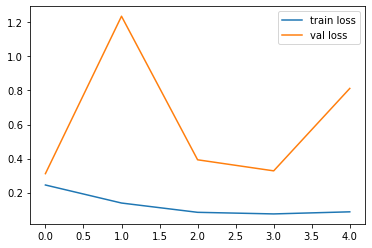

<Figure size 432x288 with 0 Axes>

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

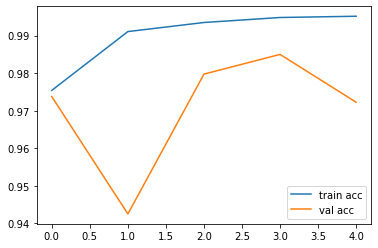

<Figure size 432x288 with 0 Axes>

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
model.save(r'C:\Users\akumarpandey686\Downloads\trained_model\mobilenet-2\mobilenet_5epoch_.h5')

In [103]:
from keras.preprocessing import image

In [19]:
img = image.load_img(r'C:\Users\akumarpandey686\Downloads\data\just_tesing_data\p\porn (1).png',target_size=(224,224))
img = np.asarray(img)
#plt.imshow(img)
img = img/255

In [20]:
from tensorflow.keras.applications.mobilenet import preprocess_input

In [21]:
img = np.expand_dims(img,axis=0)
img_data = preprocess_input(img)
img_data.shape

(1, 224, 224, 3)

In [22]:
output = model.predict(img_data)
print(output)

[[1.0000000e+00 3.7304535e-27]]


In [23]:
a=np.argmax(output, axis=1)
print(a)

[0]


In [24]:
if(a==0):
    print("np")
else:
    print("p")

np


In [26]:
#making prediction on test data
test_datag = ImageDataGenerator(rescale = 1./255)
test_d = test_datag.flow_from_directory(r'C:\Users\akumarpandey686\Downloads\data3_train_test_val\data3_train_test_val\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=False)

Found 4000 images belonging to 2 classes.


In [27]:
y_pred_ = model.predict(test_d)
# for i in y_pred:
#     print(i)

In [28]:
rounded_pred = np.argmax(y_pred_,axis=1)
# for i in rounded_pred:
#     print(i)

In [29]:
model.evaluate(test_d)

125/125 [==============================] - 52s 415ms/step - loss: 2.6358 - accuracy: 0.9390


[2.635805368423462, 0.9390000104904175]

In [31]:
test_d.reset()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
Y_pred = model.predict_generator(test_d)
#y_pred_ = np.argmax(y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_d.classes, rounded_pred))
print('Classification Report')
target_names = ['np', 'p']
print(classification_report(test_d.classes, rounded_pred, target_names=target_names))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[1795  205]
 [  39 1961]]
Classification Report
              precision    recall  f1-score   support

          np       0.98      0.90      0.94      2000
           p       0.91      0.98      0.94      2000

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [35]:
accuracy = accuracy_score(test_d.classes,rounded_pred)
precision = precision_score(test_d.classes,rounded_pred)
recall = recall_score(test_d.classes,rounded_pred)
	#specificity = recall_score(classes,final_p)
roc_auc = roc_auc_score(test_d.classes,rounded_pred)
f1 = f1_score(test_d.classes,rounded_pred)
# 	cm1 = confusion_matrix(classes,predict_prob_final))

In [36]:
print("accuracy  is: ",accuracy)
print("precision  is: ",precision)
	# print(recall)
print("roc_auc  is: ",roc_auc)
print("f1 score of soft voting is: ",f1)
print("recall  is: ",recall)
# print("sensitivity of soft voting is: ",sensitivity)

accuracy  is:  0.939
precision  is:  0.9053554939981533
roc_auc  is:  0.9390000000000001
f1 score of soft voting is:  0.9414306289006241
recall  is:  0.9805
